# Visual extraction with places365

This is just an example to do the extraction of the visual features by using the places365 dataset. Please note that the file "classification_googlenet_places365.py" inside the scripts folder, contains the code to do the visual extraction of all the pictures from the image corpus and consolidate everything in a single csv file.

Please note that this code is based on the example of classification by caffe

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import caffe

In [3]:
caffe.set_mode_cpu()

In [4]:
#Loading the pre-trained model
model_def='googlenet_places365/deploy_googlenet_places365.prototxt'
model_weights="googlenet_places365/googlenet_places365.caffemodel"
net=caffe.Net(model_def,model_weights,caffe.TEST)

In [5]:
#Loading the mean file of the pictures
mu=np.load("googlenet_places365/places365CNN_mean.npy")
mu=mu.mean(1).mean(1)
print 'mean-subtracted values:', zip('BGR', mu)

mean-subtracted values: [('B', 104.0510072177276), ('G', 112.51448910834733), ('R', 116.67603893449996)]


In [6]:
#Creating transformer for the input data
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

In [7]:
net.blobs['data'].reshape(1,3,224, 224) #1 batch, 3 chanels, size 224 x 224 ()

In [17]:
#Loading a random image and resizing it to (224 x 224) due to the configuration of the CNN.
image = caffe.io.load_image("city-image-corpus/s_20140101_125134.jpg")
image = caffe.io.resize_image(image,(256,256))

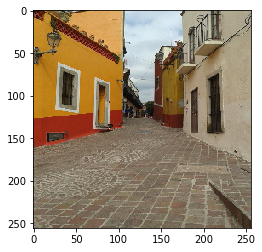

In [18]:
#Displaying the picture
plt.imshow(image)

In [19]:
#Applying the transformation to the image
transformed_image = transformer.preprocess('data', image)

In [20]:
#input data layer of the CNN
net.blobs['data'].data[...] = transformed_image

In [21]:
#Getting the output of the CNN
output = net.forward()

In [22]:
#Getting the probabilities with the visual features
output_prob = output['prob'][0] 

In [23]:
#Reading the file with labels 
labels=np.loadtxt('googlenet_places365/categories_places365.txt',str)

In [25]:
#Displaying the visual feature with more probability
print 'output label: ', labels[output_prob.argmax()], "| prob:",output_prob[output_prob.argmax()] 

output label:  ['/m/medina' '227'] | prob: 0.775033


In [26]:
#sort top five predictions
top_inds = output_prob.argsort()[::-1][:5]  # reverse sort and take five largest items

print 'probabilities and labels:'
for i in top_inds:    
    print output_prob[i], labels[i]

probabilities and labels:
0.775033 ['/m/medina' '227']
0.198995 ['/a/alley' '4']
0.00565448 ['/c/courtyard' '109']
0.00430266 ['/k/kasbah' '200']
0.00387836 ['/s/street' '319']
